In [1]:
! pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.7 MB/s 


In [2]:
from urllib.request import urlopen

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import Pitch, FontManager, add_image

Scrape the data via a link to a specific table. To get the link for a different league, find the table you want from the website. Then click “Share & more” and copy the link from the option “Modify & Share Table”. Then “click url for sharing” and get the table as a url.

In [3]:
URL = 'https://fbref.com/en/share/WubIs'
df = pd.read_html(URL)[0]
# select a subset of the columns (Squad and touches columns)
# df = df[['Unnamed: 0_level_0', 'Touches']].copy()
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index
# df = df.drop(["Def Pen", "Att Pen", "Live"], axis = 1) # drop the def pen, att pen, live touches column
df

,Squad,Def 3rd,Mid 3rd,Att 3rd
0,Almería,2889,3069,1366
1,Athletic Club,2224,3685,2517
2,Atlético Madrid,2737,4068,1917
3,Barcelona,2394,5164,3055
4,Betis,2641,3677,1807
5,Cádiz,2474,2752,1382
6,Celta Vigo,2649,3909,2031
7,Elche,2648,3167,1411
8,Espanyol,2166,3187,1699
9,Getafe,2201,3026,1298


Get the league average percentages



In [4]:
touches_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
df_total = pd.DataFrame(df[touches_cols].sum())
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

Calculate the percentages for each team and sort so that the teams make the most touches are last

In [5]:
df[touches_cols] = df[touches_cols].divide(df[touches_cols].sum(axis=1), axis=0) * 100.
df.sort_values(['Att 3rd', 'Def 3rd'], ascending=[True, False], inplace=True)
df

,Squad,Def 3rd,Mid 3rd,Att 3rd
0,Almería,39.445658,41.903332,18.651010
7,Elche,36.645447,43.827844,19.526709
9,Getafe,33.731801,46.375479,19.892720
11,Mallorca,36.907731,42.584715,20.507555
5,Cádiz,37.439467,41.646489,20.914044
18,Valladolid,38.041183,40.232313,21.726505
2,Atlético Madrid,31.380417,46.640679,21.978904
4,Betis,32.504615,45.255385,22.240000
10,Girona,34.212103,43.187537,22.600359
6,Celta Vigo,30.841774,45.511701,23.646525


Get Stats Perform’s logo and Fonts

In [13]:
SP_LOGO_URL = ('https://upload.wikimedia.org/wikipedia/commons/d/d5/StatsPerform_Logo_Primary_01.png')
sp_logo = Image.open(urlopen(SP_LOGO_URL))

# a FontManager object for using a google font (default Robotto)
fm = FontManager()
# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

In [6]:
from google.colab import drive
drive.mount('/content/drive/')
# Coge la foto que se ha subido
URL_foto_1 = "logo.png"
foto = Image.open(URL_foto_1)

Mounted at /content/drive/


Plot the percentages

Text(1, 0.5, 'Realizado por: Santiago Martínez Medina y José Antonio Funes Pérez')

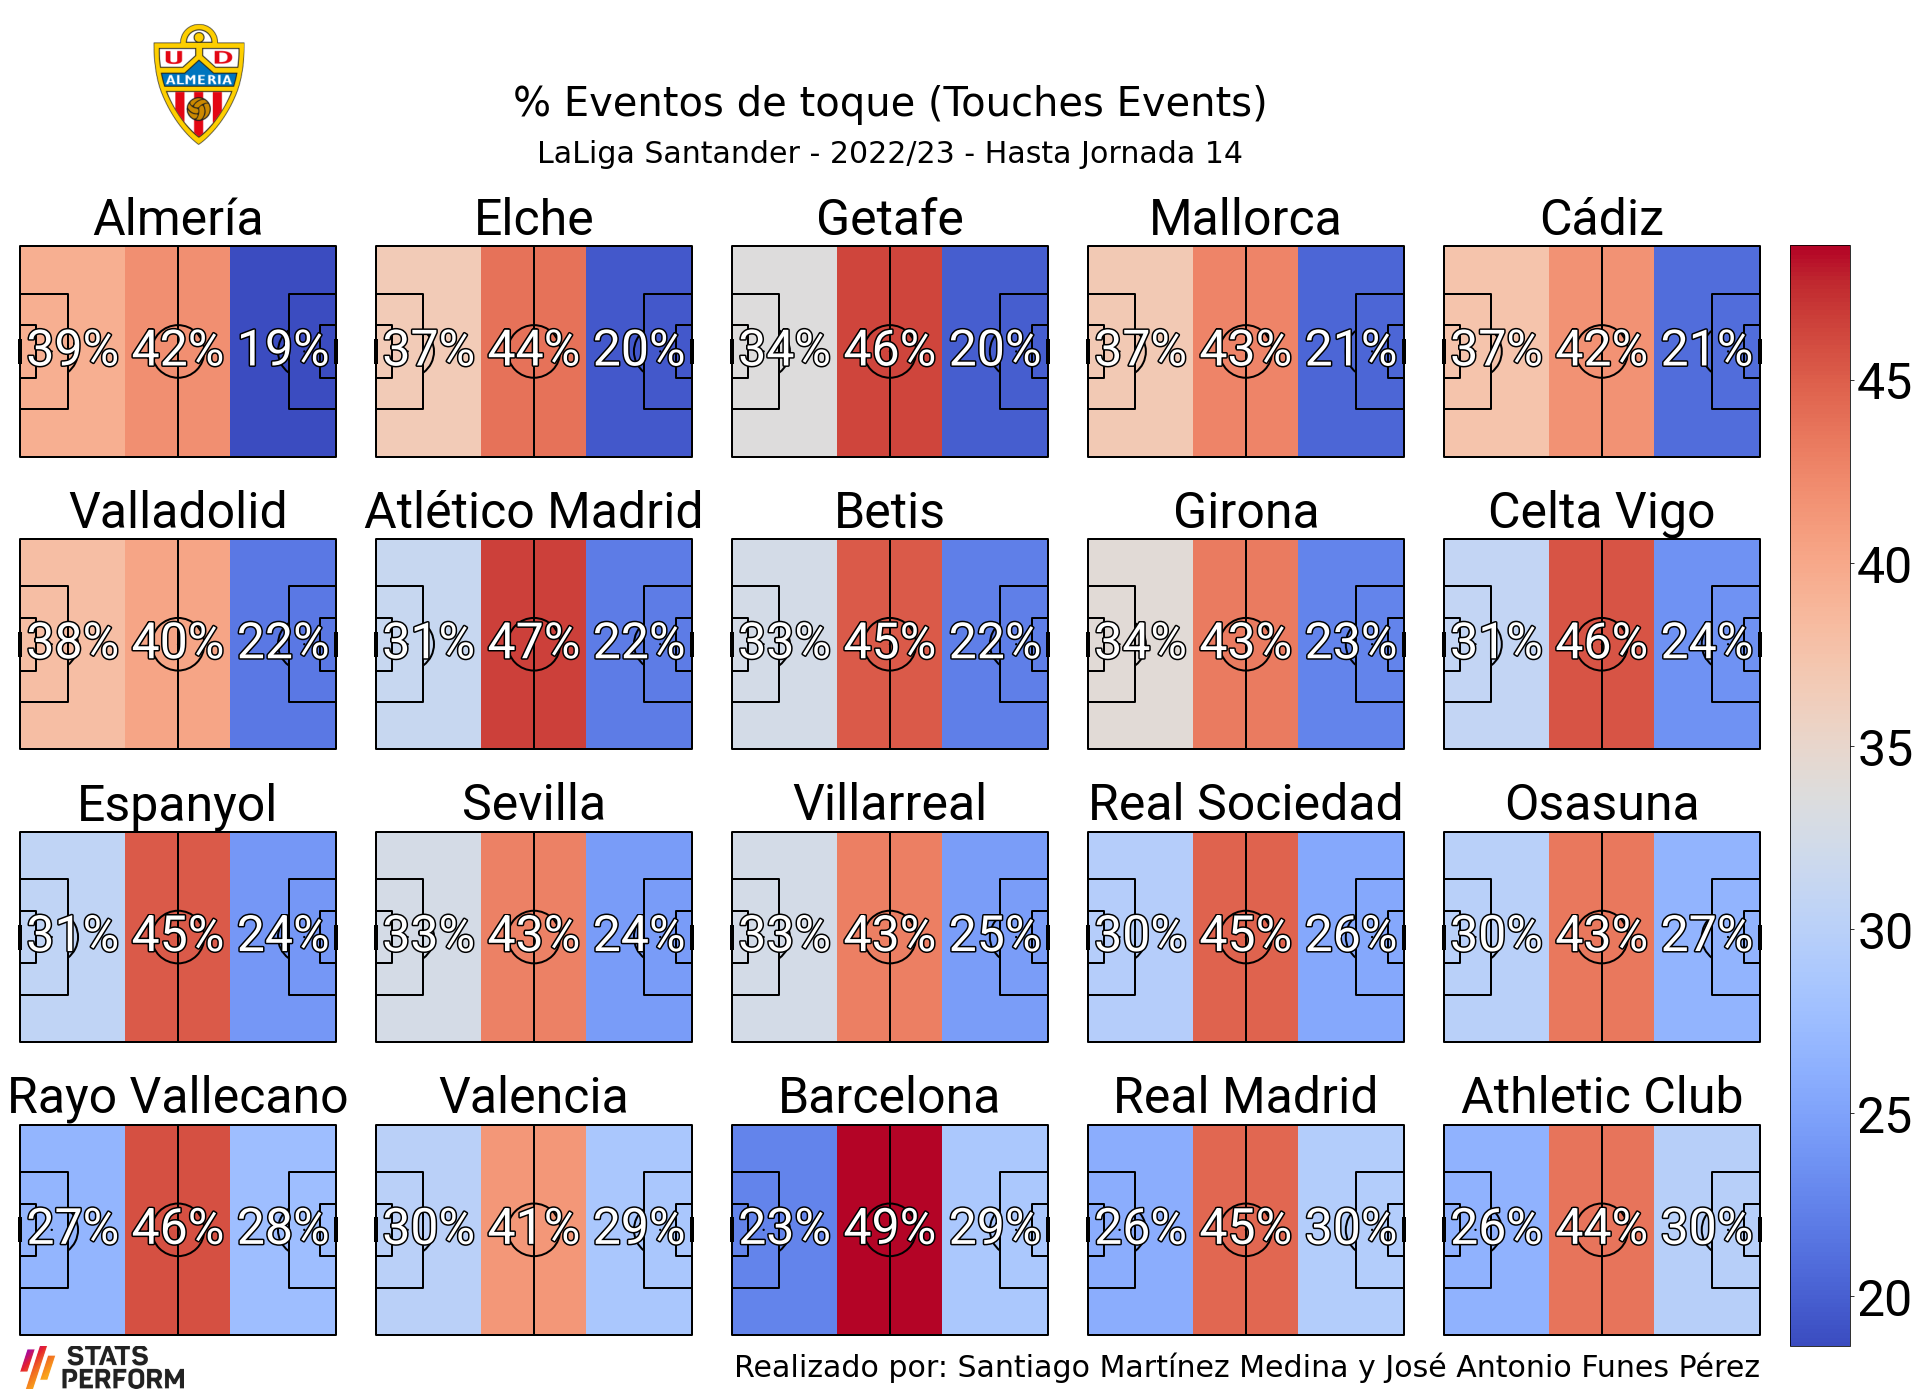

In [35]:
# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20)

# mplsoccer calculates the binned statistics usually from raw locations, such as touches events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.8
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df['Squad'].values
vmin = df[touches_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = df[touches_cols].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i],
            ha='center', va='center', fontsize=50,
            fontproperties=fm.prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = df.loc[df.Squad == teams[i], touches_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=50, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

# if its the Bundesliga remove the two spare pitches
if len(teams) == 18:
    for ax in axs['pitch'][-1, 3:]:
        ax.remove()

# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(50)

# title and endnote
add_image(sp_logo, fig,
          left=axs['endnote'].get_position().x0,
          bottom=axs['endnote'].get_position().y0,
          height=axs['endnote'].get_position().height)

add_image(foto, fig,
          left=axs['title'].get_position().x0 + 0.05,
          bottom=axs['title'].get_position().y0,
          height=axs['title'].get_position().height + 0.05)

axs['title'].text(0.5, 0.70, '% Eventos de toque (Touches Events)', fontsize=40, va='center', ha='center')
SUB_TEXT = ('LaLiga Santander - 2022/23 - Hasta Jornada 14')
axs['title'].text(0.5, 0.30, SUB_TEXT, fontsize=30, va='top', ha='center')


axs['endnote'].text(1, 0.5, 'Realizado por: Santiago Martínez Medina y José Antonio Funes Pérez',
                    fontsize=30, va='center', ha='right')


Plot the percentage point difference

In [37]:
# Calculate the percentage point difference from the league average
df[touches_cols] = df[touches_cols].values - df_total.values

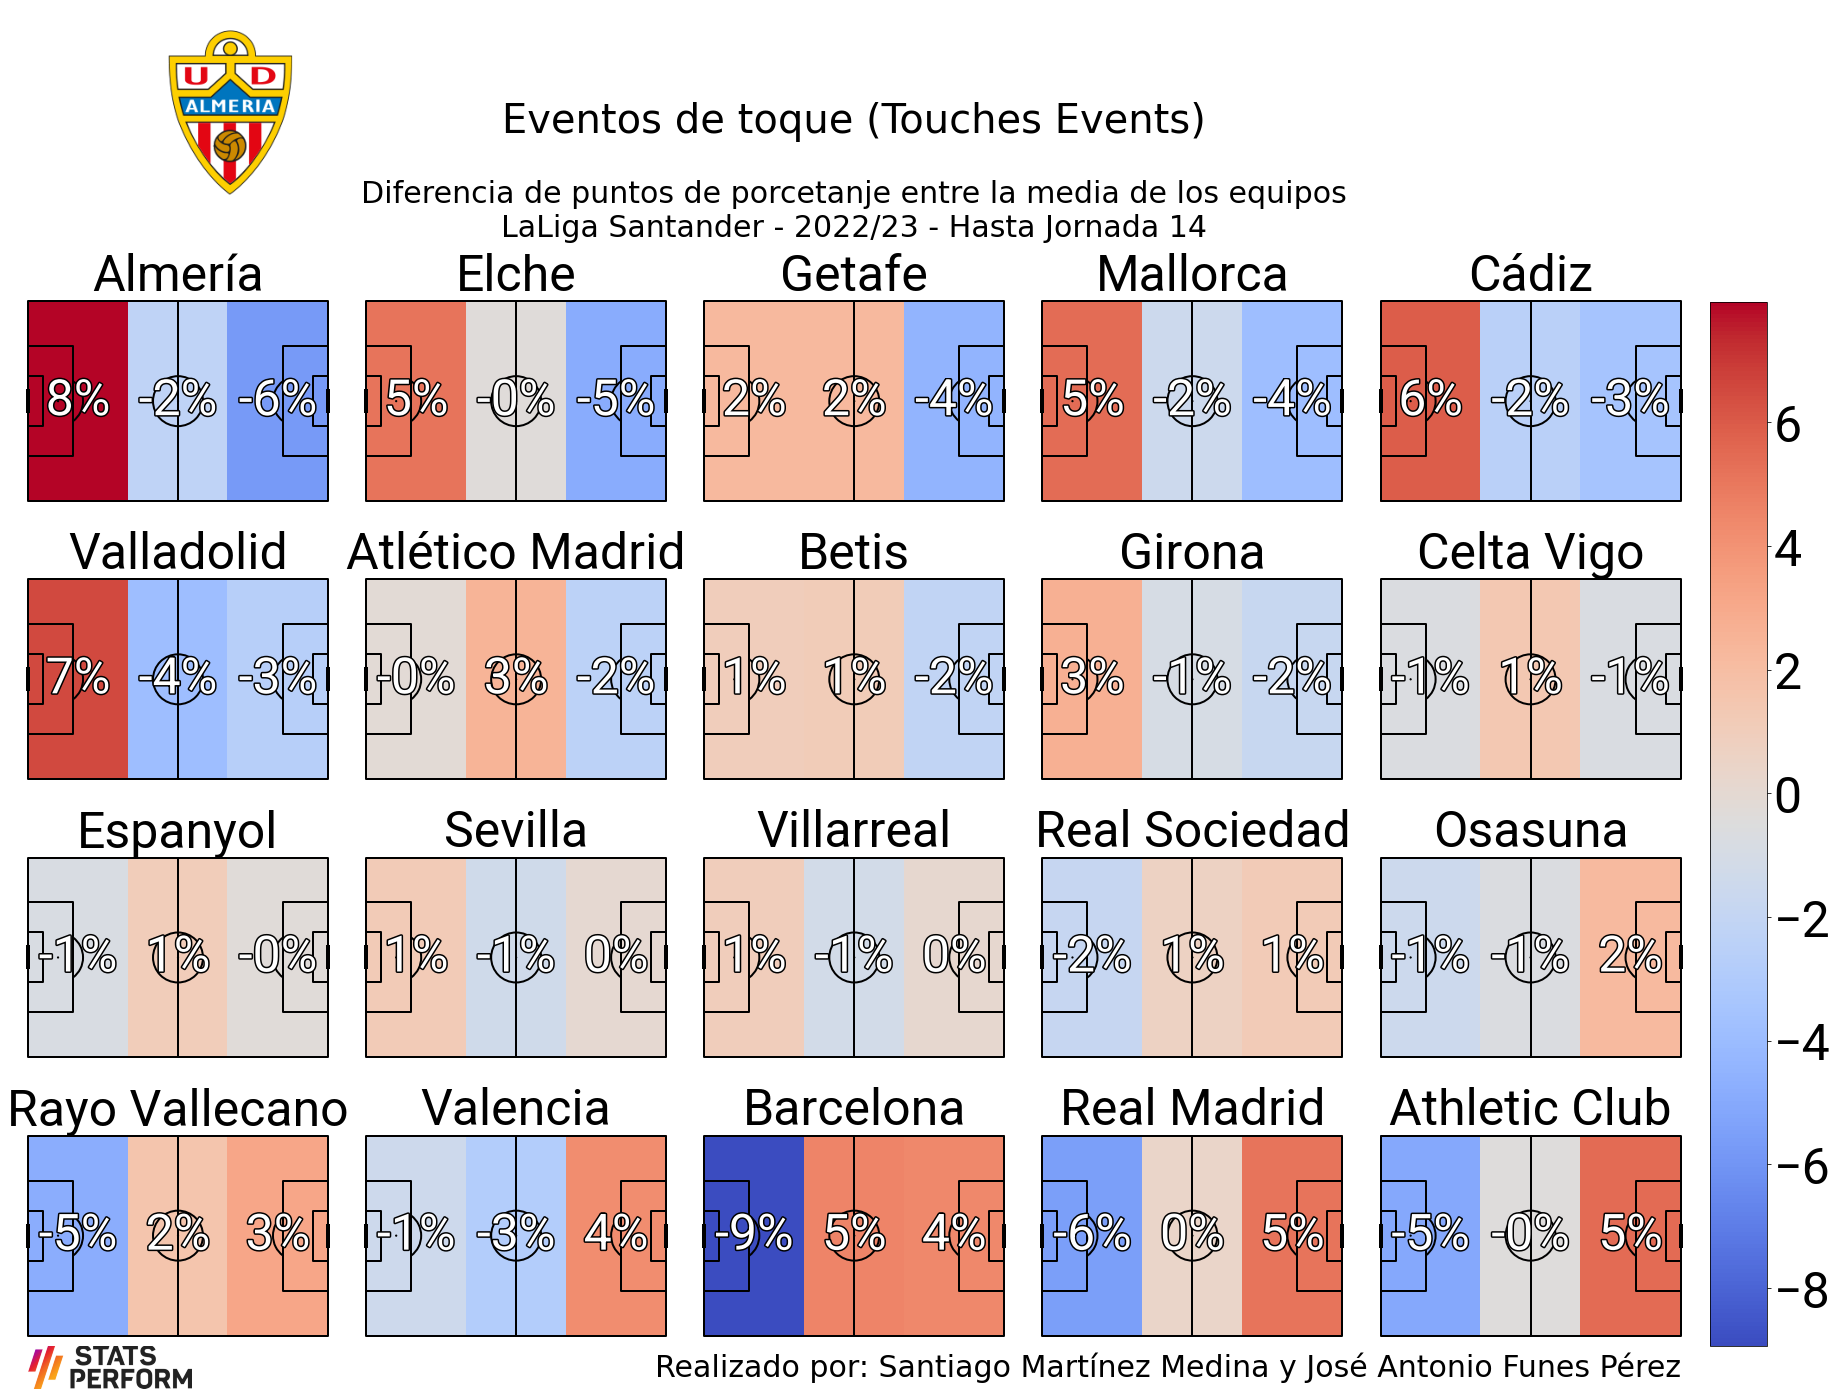

In [38]:
GRID_HEIGHT = 0.76
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.1, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df['Squad'].values
vmin = df[touches_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = df[touches_cols].max().max()

for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i], ha='center', va='center', fontsize=50, fontproperties=fm.prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = df.loc[df.Squad == teams[i], touches_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, str_format='{0:.0f}%', fontsize=50,
                                   ax=ax, ha='center', va='center')

# if its the Bundesliga remove the two spare pitches
if len(teams) == 18:
    for ax in axs['pitch'][-1, 3:]:
        ax.remove()

# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.035))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(50)

# title and endnote
add_image(sp_logo, fig,
          left=axs['endnote'].get_position().x0,
          bottom=axs['endnote'].get_position().y0,
          height=axs['endnote'].get_position().height)

add_image(foto, fig,
          left=axs['title'].get_position().x0 + 0.05,
          bottom=axs['title'].get_position().y0,
          height=axs['title'].get_position().height + 0.05)

axs['title'].text(0.5, 0.70, 'Eventos de toque (Touches Events)', fontsize=40, va='center', ha='center')
SUB_TEXT = ('Diferencia de puntos de porcetanje entre la media de los equipos\nLaLiga Santander - 2022/23 - Hasta Jornada 14')
axs['title'].text(0.5, 0.30, SUB_TEXT, fontsize=30, va='top', ha='center')


axs['endnote'].text(1, 0.5, 'Realizado por: Santiago Martínez Medina y José Antonio Funes Pérez',
                    fontsize=30, va='center', ha='right')

plt.show()  # If you are using a Jupyter notebook you do not need this line